In [0]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='16sBf2VtnnlUnIPgqoKpR_rN8WTU88uSA',
                                    dest_path='./mrob.zip',
                                    unzip=True)

gdd.download_file_from_google_drive(file_id='1HQqNHCEqvzt2ZgDRAtUJjQoWoboQRfLS',
                                    dest_path='./points_dict.pkl',
                                    unzip=False)

In [0]:
!sudo apt install build-essential cmake python3-distutils python3-dev libeigen3-dev

In [0]:
!cd mrob && mkdir build && cd build && cmake .. && make -j

In [0]:
!ls -l 'mrob/lib'

In [0]:
path = 'mrob/lib'
import sys
sys.path.append(path)
import mrob

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

def skew(x):
    return np.array([[0, -x[2], x[1]],
                     [x[2], 0, -x[0]],
                     [-x[1], x[0], 0]])


In [9]:
points_dict = load_obj('data')
T = load_obj('T')
X = points_dict['X']
Y = points_dict['Y']
S = points_dict['S']

print(X.shape, Y.shape, S.shape, T.shape)

(20, 3) (20, 3) (20, 3, 3) (4, 4)


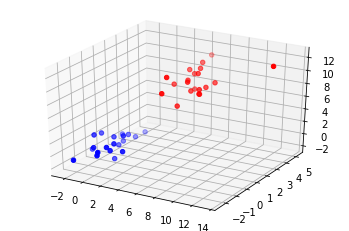

In [39]:
T = mrob.SE3(np.zeros(6))
X_trans = T.transform_array(X.T).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:,0], X[:,1], X[:,2], marker='o', c='b')
ax.scatter(X_trans[:,0], X_trans[:,1], X_trans[:,2], marker='o', c='b')
ax.scatter(Y[:,0], Y[:,1], Y[:,2], marker='o', c='r')